In [1]:
import util
from tqdm import tqdm
import numpy as np


ds = util.make_dataset('train')

image_count = 0
parcel_counts= np.array([])
pixel_counts = []
values = []
for sample in tqdm(ds):
    image_count+=1
    #parcel_counts = np.append(parcel_counts, len(sample['masks']))
    print(sample['masks'].shape)
    print(sample['values'].shape)


    #for mask in sample['masks']:
    #    pixel_counts.append(np.count_nonzero(mask))
    #for value in sample['values']:
    #    values.append(value)



print(image_count)
print(parcel_counts)
#print(np.mean(pixel_counts))
#print(np.mean(values))


    

Reading GeoDataFrame...
Done
Loading all values...
Done...


  0%|          | 1/1085 [00:00<07:14,  2.49it/s]

torch.Size([500, 262144])
torch.Size([500])


  0%|          | 2/1085 [00:01<11:35,  1.56it/s]

torch.Size([500, 262144])
torch.Size([500])


  0%|          | 3/1085 [00:02<15:19,  1.18it/s]

torch.Size([500, 262144])
torch.Size([500])


  0%|          | 4/1085 [00:02<11:20,  1.59it/s]

torch.Size([500, 262144])
torch.Size([500])


  0%|          | 5/1085 [00:03<11:41,  1.54it/s]

torch.Size([500, 262144])
torch.Size([500])


  1%|          | 6/1085 [00:04<14:15,  1.26it/s]

torch.Size([500, 262144])
torch.Size([500])


  1%|          | 6/1085 [00:05<15:06,  1.19it/s]


KeyboardInterrupt: 

In [9]:
print(max(parcel_counts))

464.0


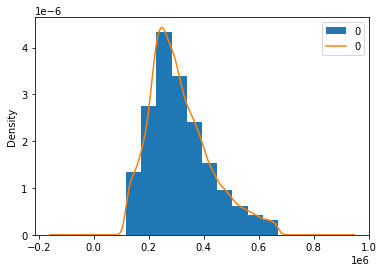

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

vals = pd.DataFrame(np.array(values))

fig, ax = plt.subplots(figsize = (6,4))
vals.plot(kind='hist', density=True, bins= 10, ax=ax)
vals.plot(kind='kde', ax =ax)

plt.show()